# Import Statements

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Raw Data

In [19]:
theta_rel_deg = np.array([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180]) #deg
theta_rel = (np.pi / 180) * theta_rel_deg #rad
alpha_theta_deg = np.array([2] * len(theta_rel_deg)) #deg
alpha_theta_rel = (np.pi / 180) * alpha_theta_deg #rad

intensity = np.array([42.24, 43.84, 38.44, 32.73, 23.49, 18.62, 18.04, 19.96, 25.44, 30.49, 41.79, 46.44, 48.28]) #lux (600)
alpha_intensity_std = np.array([0.3904, 0.5324, 0.677, 0.5178, 0.3958, 0.2447, 0.2593, 0.3225, 0.4674, 0.445, 0.4194, 0.5464, 0.593]) # lux: std err on intensity
alpha_intensity = np.array([1.5] * len(intensity))

# Scatter Plot

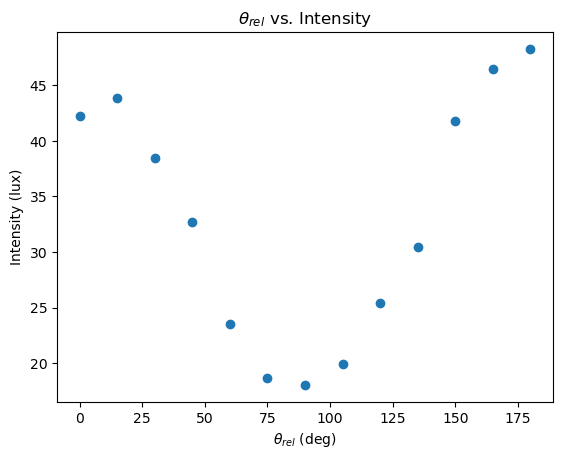

In [25]:
plt.scatter(theta_rel_deg, intensity)
plt.title(r"$\theta_{rel}$ vs. Intensity")
plt.xlabel(r"$\theta_{rel}$ (deg)")
plt.ylabel(r"Intensity (lux)")
plt.show()

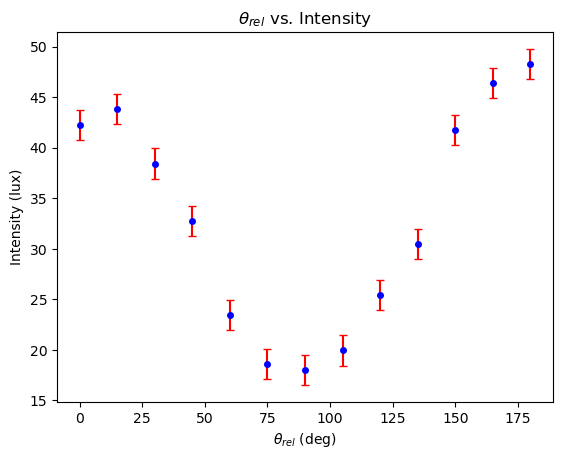

In [24]:
plt.errorbar(theta_rel_deg, intensity, yerr=alpha_intensity, fmt='o', markersize=4, color='blue', ecolor='red', elinewidth=1.5, capsize=3, capthick=1)
plt.title(r"$\theta_{rel}$ vs. Intensity")
plt.xlabel(r"$\theta_{rel}$ (deg)")
plt.ylabel(r"Intensity (lux)")
plt.show()

# Curve Fit

Fit to $I = I_0 \cos^2 (\theta_{rel} - \theta_0) + I_{bg}$ where

- $I_0 =$ amplitude of the intensity variation
- $\theta_0 =$ possible offset due to a mis-calibration (should be close to 0)
- $I_{bg}$ = background intensity


In [5]:
def malus_fit(theta_rel, theta_0, I_0, I_bg):
    I = I_0 * (np.cos(theta_rel - theta_0)) ** 2 + I_bg
    return I

In [11]:
initial_guess = [0, np.max(intensity), np.min(intensity)]  # Initial guess: theta_0=0, I_0=max intensity, I_bg=min intensity
bounds = ([-np.pi, 0, 0], [np.pi, np.inf, np.inf])  # theta_0 in radians within [-pi, pi], I_0 and I_bg non-negative

popt_bounded, pcov_bounded = curve_fit(
    malus_fit, theta_rel, intensity, sigma=alpha_intensity, absolute_sigma=True, p0=initial_guess, bounds=bounds
)

theta_0_fit, I_0_fit, I_bg_fit = popt_bounded
theta_0_fit_deg = (180 / np.pi) * theta_0_fit  # convert theta_0 to degrees

theta_0_err, I_0_err, I_bg_err = np.sqrt(np.diag(pcov_bounded))
theta_0_err_deg = (180 / np.pi) * theta_0_err  # convert theta_0 uncertainty to degrees

# Display the fitted parameters and their uncertainties
theta_0_fit_deg, I_0_fit, I_bg_fit, theta_0_err_deg, I_0_err, I_bg_err

print(f'theta_0: {theta_0_fit_deg:.3f} +/- {theta_0_err_deg:.3f}')
print(f'I_0: {I_0_fit:.3f} +/- {I_0_err:.3f}')
print(f'I_bg: {I_bg_fit:.3f} +/- {I_bg_err:.3f}')

theta_0: -1.429 +/- 1.215
I_0: 28.879 +/- 1.140
I_bg: 17.513 +/- 0.742


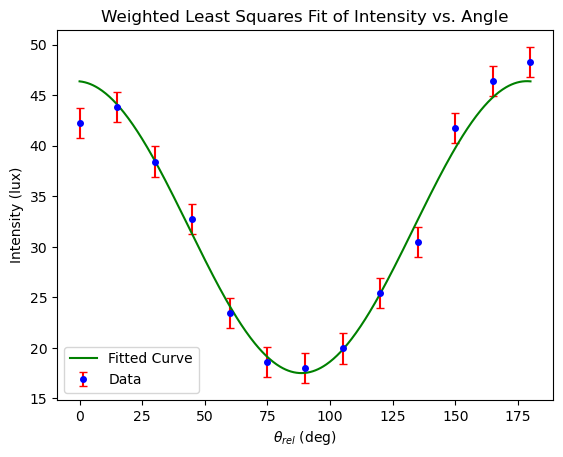

In [20]:
theta_rel_fine = np.linspace(np.min(theta_rel), np.max(theta_rel), 500)
intensity_fit = malus_fit(theta_rel_fine, *popt_bounded)

plt.errorbar(theta_rel_deg, intensity, yerr=alpha_intensity, fmt='o', label='Data', markersize=4, color='blue', ecolor='red', capsize=3)

plt.plot(np.degrees(theta_rel_fine), intensity_fit, label='Fitted Curve', color='green')

plt.xlabel(r"$\theta_{rel}$ (deg)")
plt.ylabel('Intensity (lux)')
plt.title('Weighted Least Squares Fit of Intensity vs. Angle')
plt.legend()
plt.show()

# Reduced $\chi^2$

In [21]:
residuals = intensity - malus_fit(theta_rel, *popt_bounded)

dof = len(intensity) - len(popt_bounded)

chi2 = np.sum((residuals / alpha_intensity) ** 2)
reduced_chi2 = chi2 / dof

reduced_chi2

1.5735458220189946

In [12]:
plt.scatter(theta_rel_deg, residuals)
plt.title()
plt.show()

NameError: name 'residuals' is not defined